# 1. Improving your Data Visualization

#### Highlighting Data
Why Data Visualization?
- Raw Data → tactile representations
- Sometimes purely cosmetic
- Sometimes essential to understanding data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("data/"))

['census-state-populations.csv', 'markets_cleaned.csv', 'pollution_wide.csv']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
census = pd.read_csv("data/census-state-populations.csv")
market = pd.read_csv("data/markets_cleaned.csv")
pollution = pd.read_csv("data/pollution_wide.csv")

In [4]:
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [5]:
pollution.city.unique()

array(['Cincinnati', 'Denver', 'Des Moines', 'Fairbanks', 'Houston',
       'Indianapolis', 'Long Beach', 'Vandenberg Air Force Base'],
      dtype=object)

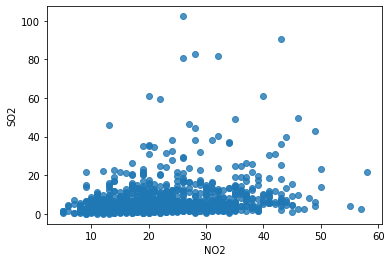

In [6]:
cinci_pollution = pollution[pollution.city == 'Cincinnati']

p = sns.regplot(x='NO2', y='SO2', data = cinci_pollution, fit_reg=False)

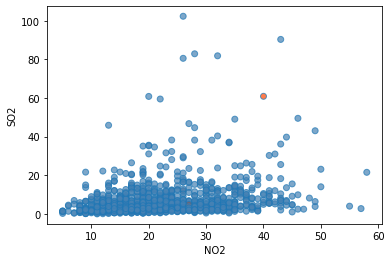

In [7]:
cinci_pollution = pollution[pollution.city == 'Cincinnati']

# Make an array of colors based upon if a row is a given day
cinci_colors = ['orangered' if day == 38 else 'steelblue' for day in cinci_pollution.day]

# Plot with additional scatter plot argument facecolors
p = sns.regplot(x='NO2', y='SO2', data = cinci_pollution, fit_reg=False, 
                scatter_kws={'facecolors': cinci_colors,'alpha': 0.7})

#### Hardcoding a highlight

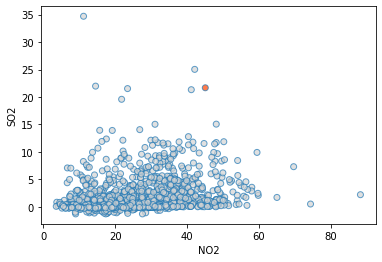

In [8]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

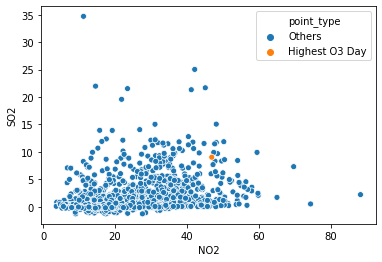

In [9]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

#### Comparing groups
What does this mean?
- Values generally higher?
- Distribution of values wider? Narrower?
- Crucial for representing your data

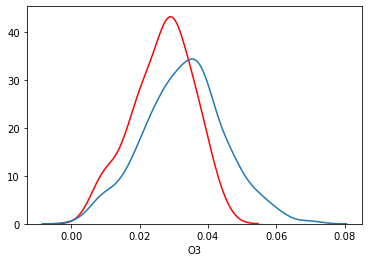

In [10]:
pollution_nov = pollution[pollution.month == 10]

sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color = 'red')
sns.distplot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)

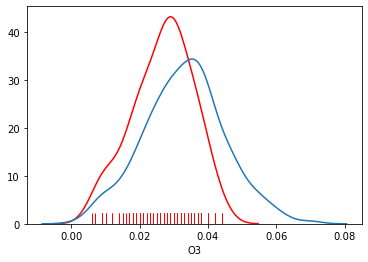

In [11]:
# Enable rugplot
sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3,hist=False, color='red', rug=True )
sns.distplot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)

Text(0.5, 0, 'Ozone (O3)')

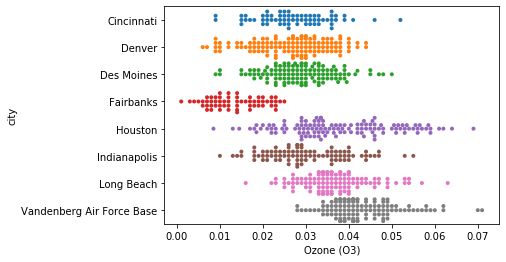

In [12]:
# The beeswarm plot
pollution_nov = pollution[pollution.month == 10]

sns.swarmplot(y="city", x="O3", data=pollution_nov, size=4)
plt.xlabel("Ozone (O3)")

#### Comparing with two KDEs

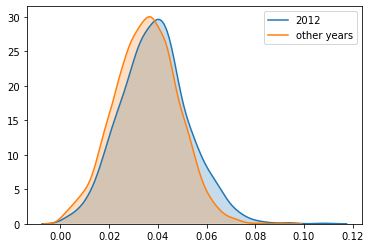

In [13]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

#### Improving your KDEs

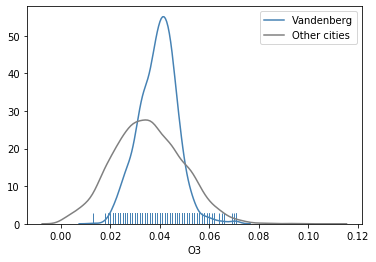

In [14]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')
plt.show()

#### Beeswarm plot

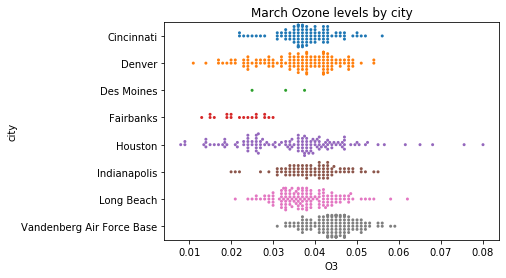

In [15]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

#### Annotations

What annotations add
- Compact and efficient communication
- Opportunity to supply deeper insight to data

<img style="width: 500px;" src="img/annot.png">

Text(13, 33, 'Look at this outlier')

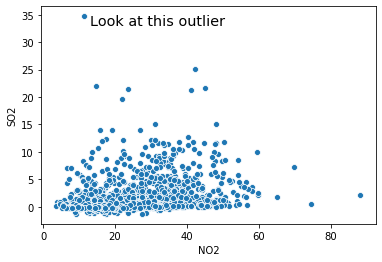

In [16]:
sns.scatterplot(x='NO2', y='SO2', data = houston_pollution)

# X and Y location of outlier and text
plt.text(13,33,'Look at this outlier', 
         # Text properties for alignment and size. 
         fontdict = {'ha': 'left', 'size': 'x-large'})

Text(60, 22, 'A buried point to look at')

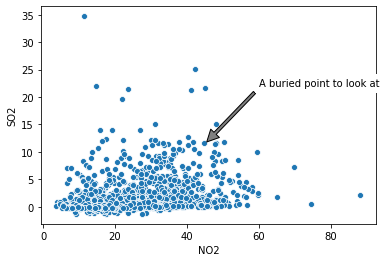

In [17]:
sns.scatterplot(x='NO2', y='SO2', data = houston_pollution)

# Arrow start and annotation location
plt.annotate('A buried point to look at', xy=(45.5,11.8), xytext=(60,22), 
             # Arrow configuration and background box 
             arrowprops={'facecolor':'grey', 'width': 3}, backgroundcolor = 'white' )

#### A basic text annotation

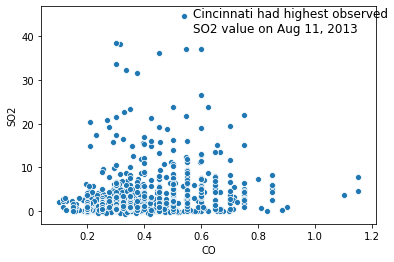

In [18]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41, 
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})

plt.show()

#### Arrow annotations

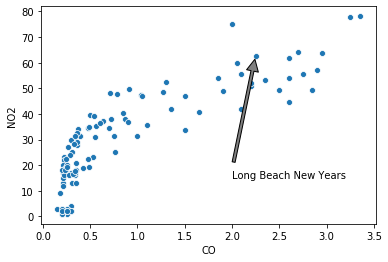

In [19]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

#### Combining annotations and color

In [20]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

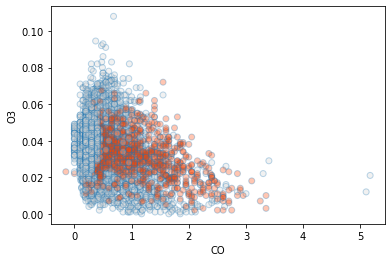

In [21]:
# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3})
plt.show() 

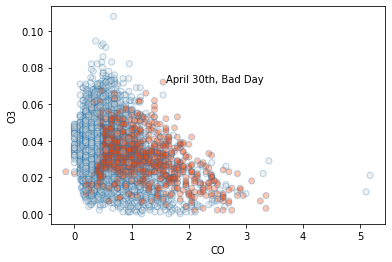

In [22]:
# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

# 2. Using color in your visualizations

#### Color in visualizations
How color is used
- Differentiates classes of data
- Encodes continuous values
- Should be used carefully

Color can be beautiful
- Boring → eye-catching
- Variety is good

#### Color can be misleading...
`"It is evident that the color-size illusion is present in a marked degree [no matter what] arrangement."
C.J. Warden & E.L. Flynn, 1926`

#### Getting rid of unnecessary color

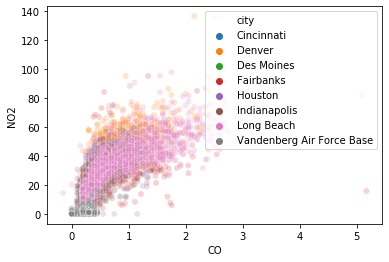

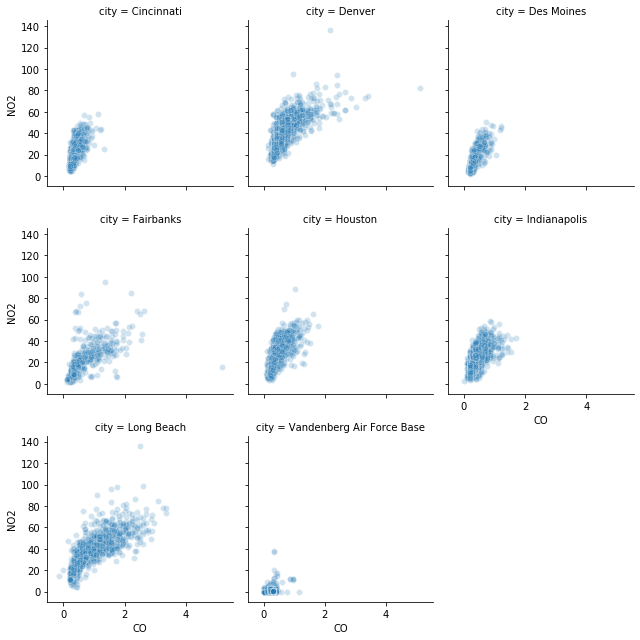

In [23]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot('CO', 'NO2',
                 alpha = 0.2,
                 hue = 'city',
                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

#### Fixing Seaborn's bar charts

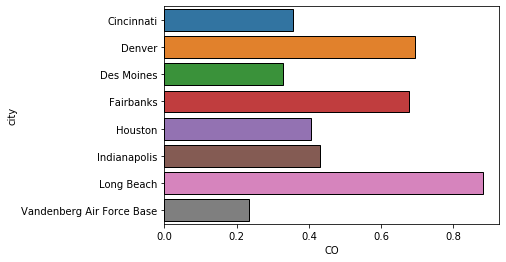

In [24]:
sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean, 
            ci = False, 
            data = pollution, 
            # Add a border to the bars 
            edgecolor = 'black')
plt.show()

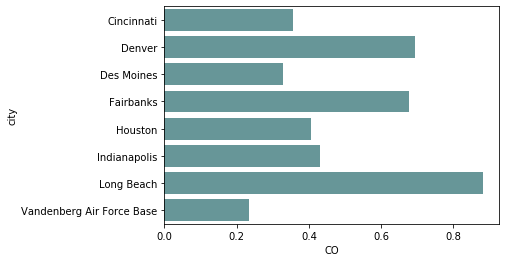

In [25]:
sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean, 
            ci = False, 
            data = pollution, 
            # Replace border with bar colors 
            color = 'cadetblue')
plt.show()

#### Continuous color palettes

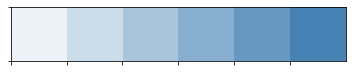

In [26]:
blue_scale = sns.light_palette("steelblue")
sns.palplot(blue_scale)

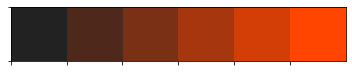

In [27]:
red_scale = sns.dark_palette("orangered")
sns.palplot(red_scale)

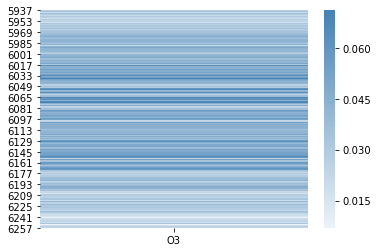

In [28]:
# Keep it simple
indy_oct = pollution.query("year == 2015 & city == 'Indianapolis'")
blue_scale = sns.light_palette("steelblue", as_cmap = True)
sns.heatmap(indy_oct[['O3']], cmap = blue_scale)

#### Be aware of color blindness
- Avoid transitions between green and red
- Palettes that use intensity are safer

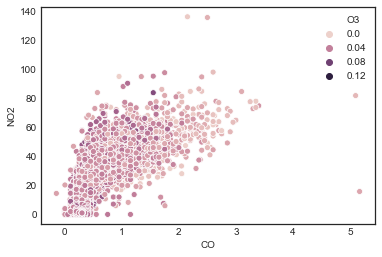

In [29]:
plt.style.use('seaborn-white')
sns.scatterplot(x = 'CO', y = 'NO2', hue = 'O3', data = pollution)

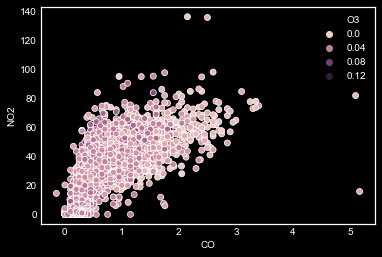

In [30]:
plt.style.use('dark_background')
sns.scatterplot(x = 'CO', y = 'NO2', hue = 'O3', data = pollution)

#### Making a custom continuous palette

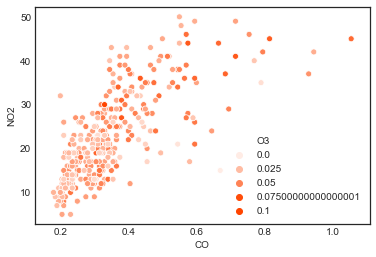

In [33]:
plt.style.use('seaborn-white')

# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

#### Customizing a diverging palette heatmap

In [34]:
pollution.loc[(pollution.month == 3) & (pollution.year == 2015)].reset_index().head()

,index,city,year,month,day,CO,NO2,O3,SO2
0,795,Cincinnati,2015,3,60,0.4150,35.0,0.038,14.40
1,796,Cincinnati,2015,3,61,0.3165,22.0,0.041,3.65
2,797,Cincinnati,2015,3,62,0.3410,23.0,0.038,6.50
3,798,Cincinnati,2015,3,63,0.3115,18.0,0.033,0.80
4,799,Cincinnati,2015,3,64,0.3115,43.0,0.042,3.80


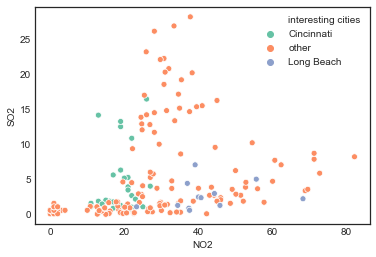

In [35]:
# Assign a new column to dataframe the desired combos
pollution['interesting cities'] = [x if x in ['Long Beach', 'Cincinnati'] else 'other' for x in pollution['city']]
sns.scatterplot(x="NO2", y="SO2", hue = 'interesting cities', palette='Set2', 
                data=pollution.query('year == 2014 & month == 12'))

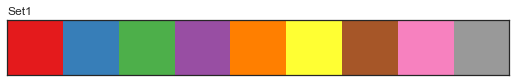

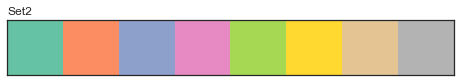

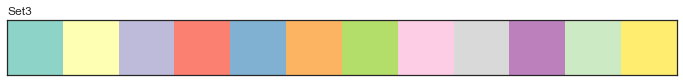

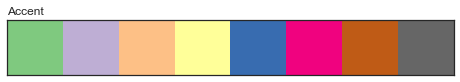

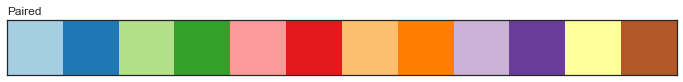

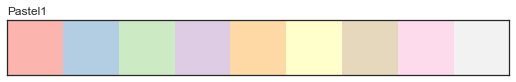

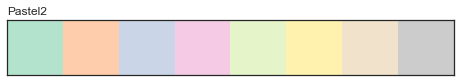

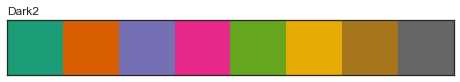

In [36]:
# Categorical data
colorbrewer_palettes = ['Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2']

for pal in colorbrewer_palettes:
    sns.palplot(pal=sns.color_palette(pal))
    plt.title(pal, loc = 'left')

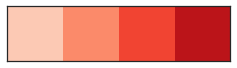

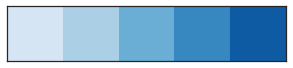

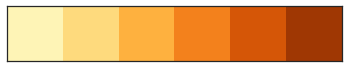

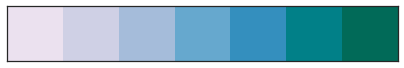

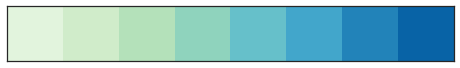

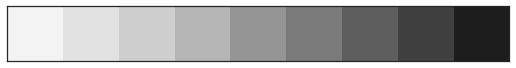

In [37]:
# Ordinal data
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']

for i, pal in enumerate(colorbrewer_palettes):
    sns.palplot(pal=sns.color_palette(pal, n_colors=i+4))

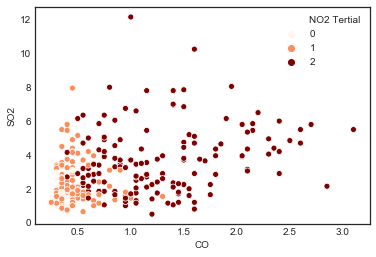

In [38]:
# Make a tertials column using qcut()
pollution['NO2 Tertial'] = pd.qcut(pollution['NO2'], 3, labels = False)

# Plot colored by the computer tertials
sns.scatterplot(x="CO", y="SO2", hue='NO2 Tertial', palette="OrRd", 
                data=pollution.query("city == 'Long Beach' & year == 2014"))

#### Using a custom categorical palette

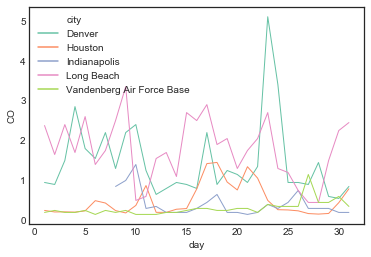

In [41]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 1,
             data = pollution_jan13)
plt.show()

#### Coloring ordinal categories

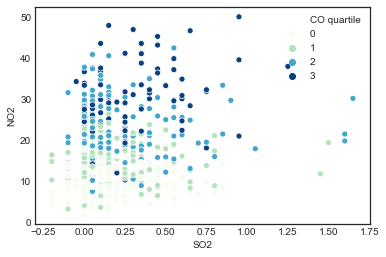

In [42]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                data = des_moines,
                palette = 'GnBu')
plt.show()

# 3. Showing uncertainty 
#### The Bootsrap

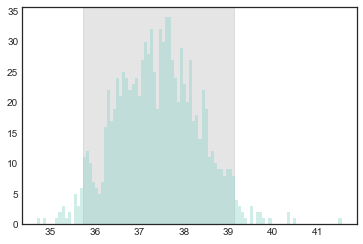

In [43]:
denver_may = pollution.query("city == 'Denver' & month == 8")

# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data, len(data)))for _ in range(n_boots)] 

# Generate 1,000 bootstrap samples
boot_means = bootstrap(denver_may.NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Shaded background of interval
plt.axvspan(lower, upper, color='grey', alpha=0.2)

# Plot histogram of samples
sns.distplot(boot_means, bins = 100, kde=False)

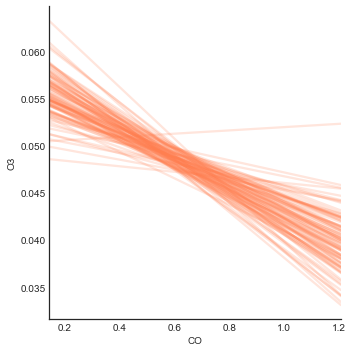

In [44]:
# Make dataframe of bootstraped data
denver_may_boot = pd.concat([denver_may.sample(n=len(denver_may), replace=True).assign(sample=i) 
                             for i in range(100)])

# Plot regressions for each sample
sns.lmplot('CO', 'O3', data=denver_may_boot, scatter=False, 
           # Tell seaborn to draw a regression 
           # line for each resample's data 
           hue='sample', 
           # Make lines orange and transparent 
           line_kws = {'color': 'coral', 'alpha': 0.2}, 
           # No confidence intervals 
           ci=None, legend = False)

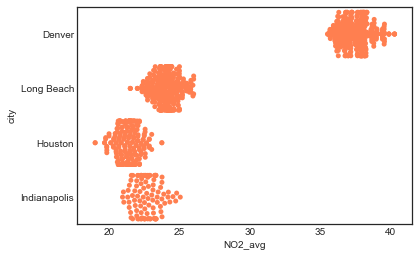

In [45]:
aug_pol = pollution.query("month == 8")

# Holder DataFrame for bootstrap samples
city_boots = pd.DataFrame()

for city in ['Denver', 'Long Beach', 'Houston', 'Indianapolis']:
    # Filter to city's NO2 
    city_NO2 = aug_pol[aug_pol.city == city].NO2
    
    # Perform 100 bootstrap samples of city's NO2 & put in DataFrame
    cur_boot = pd.DataFrame({ 'NO2_avg': bootstrap(city_NO2, 100), 'city': city })

    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])
    
    # Use beeswarm plot to visualize bootstrap samples
    sns.swarmplot(y="city", x="NO2_avg", data=city_boots, 
                  # Set all the colors to be the same 
                  color='coral')

# 4. Visualization in the data science workflow

In [46]:
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2,interesting cities,NO2 Tertial,CO quartile
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20,Cincinnati,1,0
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35,Cincinnati,0,0
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25,Cincinnati,2,1
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15,Cincinnati,1,1
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05,Cincinnati,1,1


In [47]:
# Just show median
pollution.describe(percentiles=[0.5], 
                   # Describe all columns 
                   include='all')

,city,year,month,day,CO,NO2,O3,SO2,interesting cities,NO2 Tertial,CO quartile
count,8888,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888,8888.000000,8888.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN,NaN
freq,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6710,NaN,NaN
mean,NaN,2013.621737,6.657516,187.187894,0.492867,23.689168,0.035904,3.824927,NaN,0.998875,1.461971
std,NaN,1.084081,3.328182,101.739060,0.403896,16.760212,0.013221,6.582867,NaN,0.816174,1.140868
min,NaN,2012.000000,1.000000,1.000000,-0.150000,0.000000,0.000000,-1.300000,NaN,0.000000,0.000000
50%,NaN,2014.000000,7.000000,192.000000,0.350000,22.000000,0.036000,1.650000,NaN,1.000000,1.000000
max,NaN,2015.000000,12.000000,366.000000,5.170000,136.400000,0.108000,145.000000,NaN,2.000000,3.000000


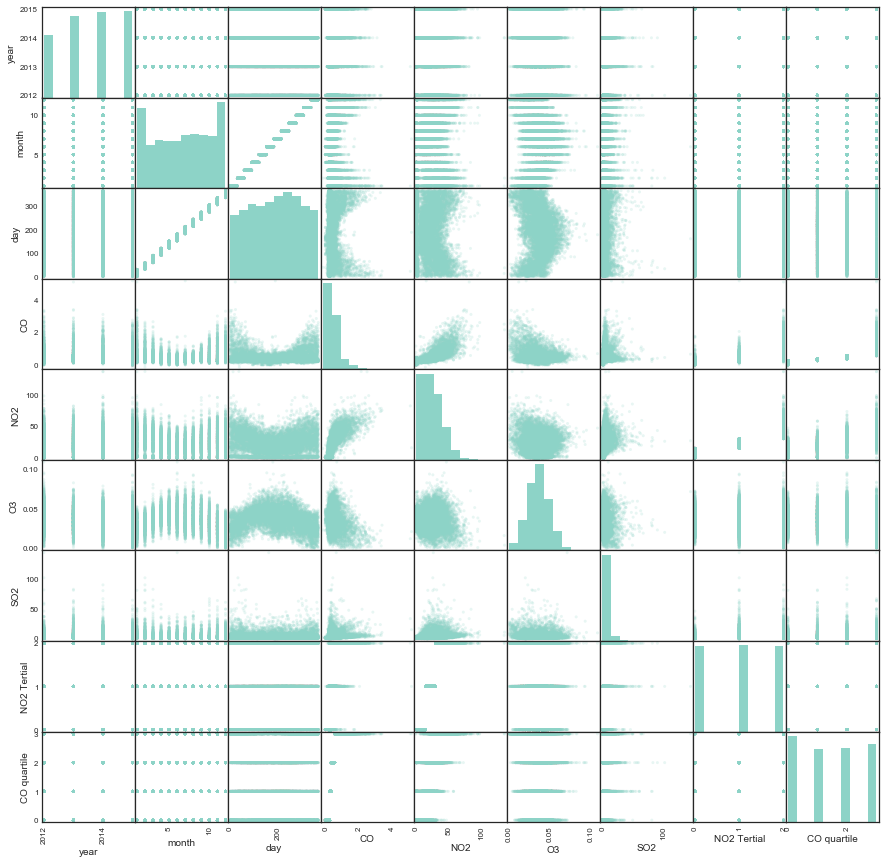

In [48]:
pd.plotting.scatter_matrix(pollution, alpha = 0.2, figsize = [15, 15]);

In [49]:
market.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


#### Exploring the patterns

Digging in deeper
- Investigating correlations
- Are correlations driven by confounding?
- Anything surprising?

Target audiences
- Shared with peers
- Be smart about design decisions
- Remember they aren't as familiar with data

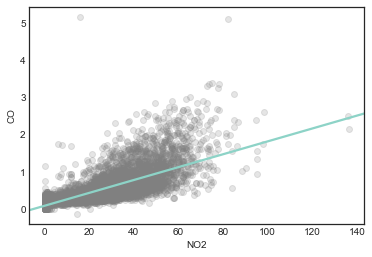

In [50]:
sns.regplot('NO2', 'CO', ci=False, data=pollution, 
            # Lower opacity of points 
            scatter_kws={'alpha':0.2, 'color':'grey'} )

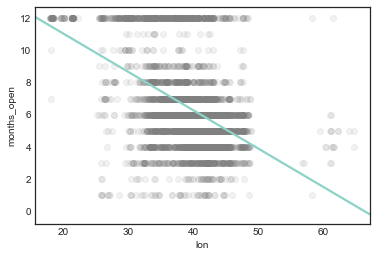

In [51]:
sns.regplot(x = 'lon', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = market)

plt.show()

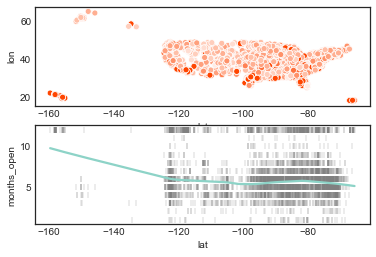

In [52]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot("lat", "lon", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = market,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lat', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = market, 
            ax = ax2)

plt.show()